In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy.io import fits
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

In [2]:
%matplotlib notebook

In [3]:
RXTE = fits.open('https://asd.gsfc.nasa.gov/Craig.Markwardt//galscan/sourcelc/sourcelc_MXB_1730-33.lc')
data = RXTE[1].data

<IPython.core.display.Javascript object>


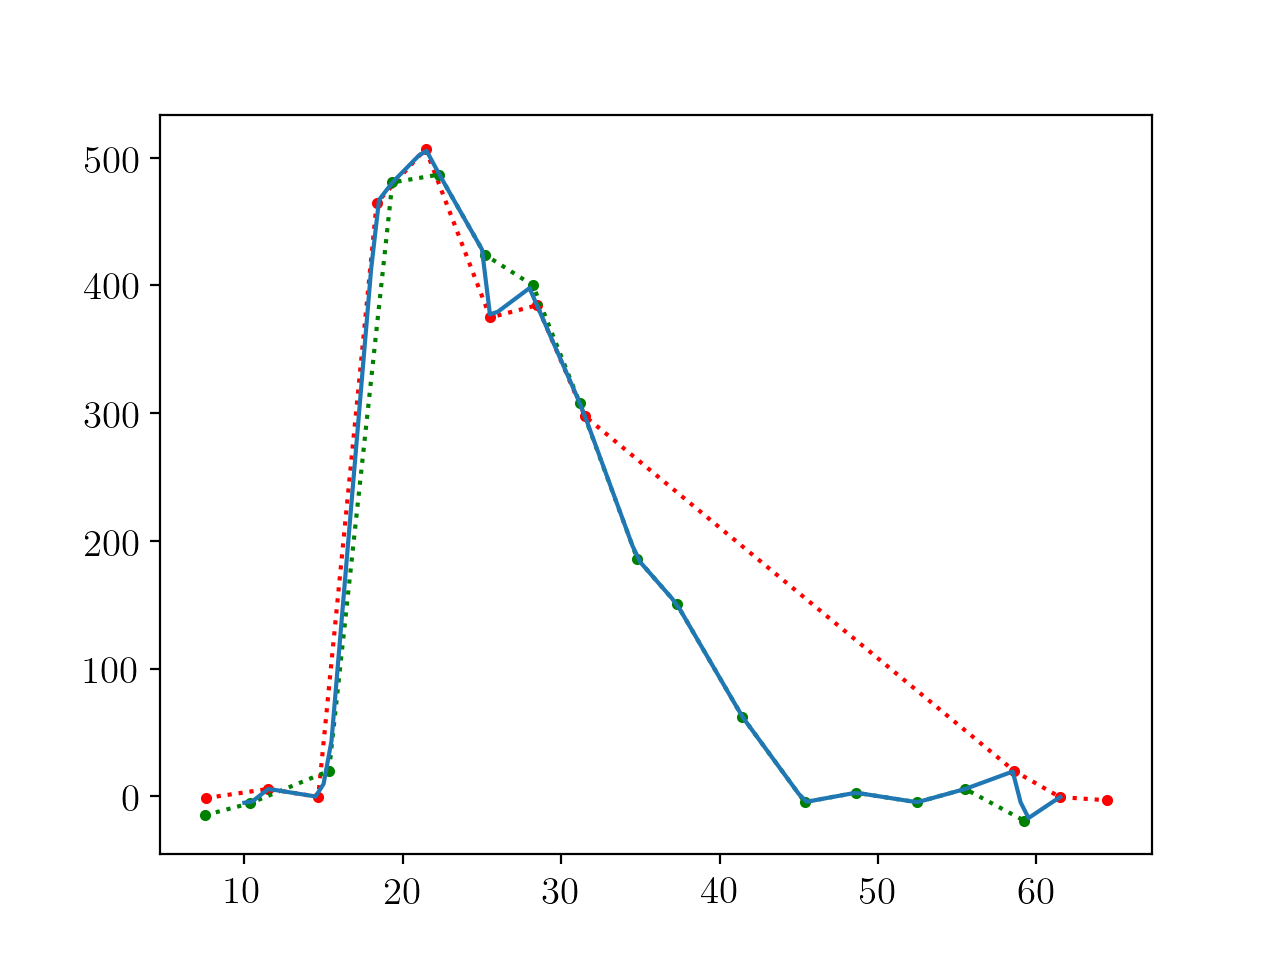

In [4]:
plt.figure()
#plt.plot(data['TIME'][(data['TIME'] > 55375) & (data['TIME'] < 55450)]-55376,
#         data['RATE'][(data['TIME'] > 55375) & (data['TIME'] < 55450)],'.:b')

plt.plot(data['TIME'][(data['TIME'] > 52770) & (data['TIME'] < 52830)]-52765,
         data['RATE'][(data['TIME'] > 52770) & (data['TIME'] < 52830)]*0.55,'.:r')

plt.plot(data['TIME'][(data['TIME'] > 52870) & (data['TIME'] < 52924)]-52864,
         data['RATE'][(data['TIME'] > 52870) & (data['TIME'] < 52924)]*0.65,'.:g')


all_t = np.concatenate([
                        data['TIME'][(data['TIME'] > 52770) & (data['TIME'] < 52830)]-52765,
                        data['TIME'][(data['TIME'] > 52870) & (data['TIME'] < 52924)]-52864])

all_y = np.concatenate([
                        data['RATE'][(data['TIME'] > 52770) & (data['TIME'] < 52830)]*0.55,
                        data['RATE'][(data['TIME'] > 52870) & (data['TIME'] < 52924)]*0.65])

interpf = interp1d(all_t,all_y,kind=1)
new_x = np.arange(10,62,0.5)
new_y = interpf(new_x)
plt.plot(new_x,new_y,'-')

<IPython.core.display.Javascript object>


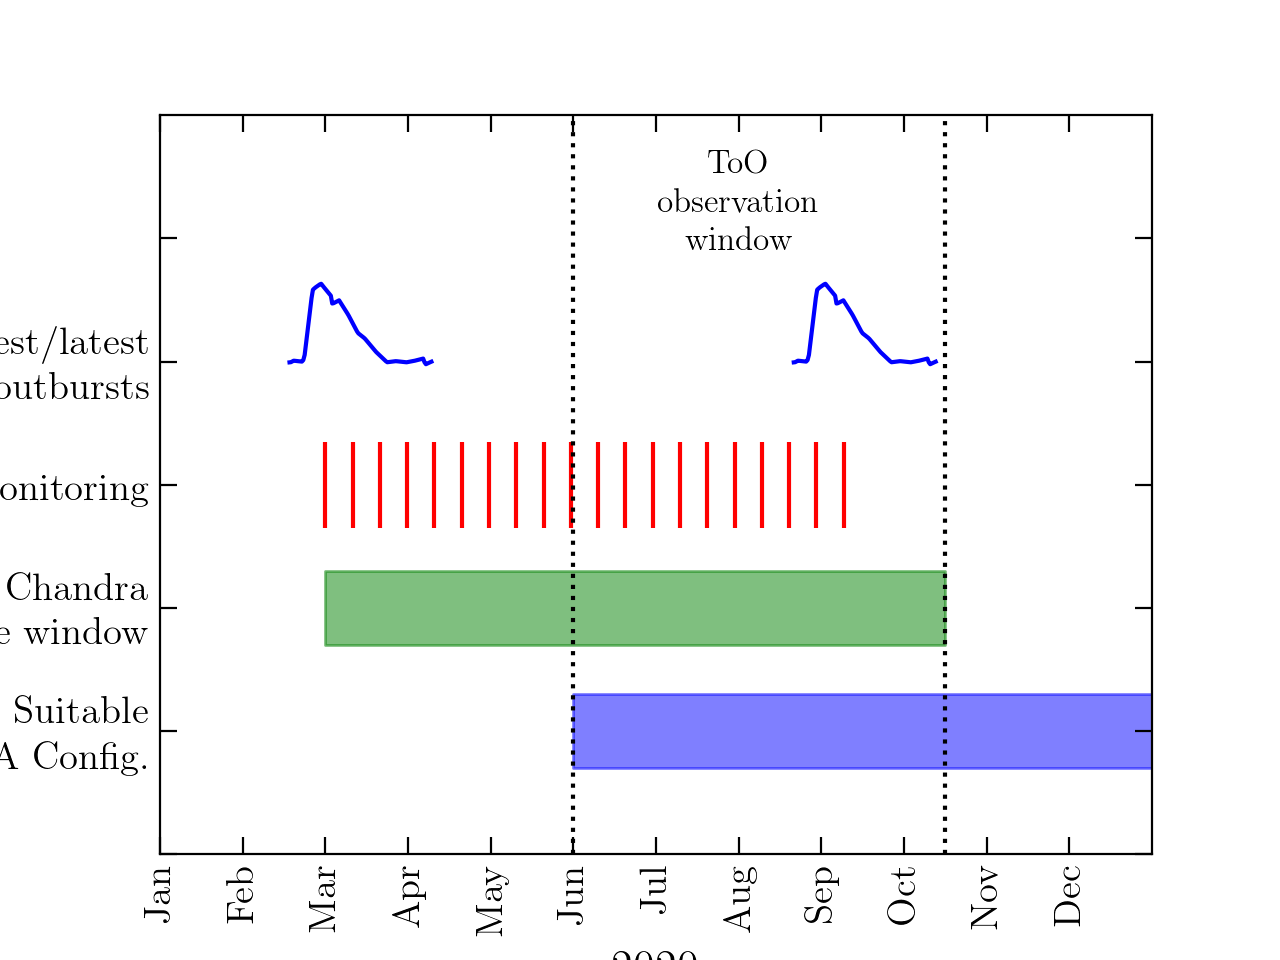

In [18]:
plt.figure()
plt.fill_between([5,12],0.7,1.3,color='b',alpha=0.5) #'Acceptable VLA configuration'
plt.fill_between([2,9.5],1.7,2.3,color='g',alpha=0.5) #'Chandra viewing window'
plt.vlines(np.arange(2.,8.5,0.33),2.65,3.35,'r')
lc_x = np.arange(10,62,0.5)
lc_y = interpf(new_x)
plt.plot(((lc_x-11)/30.0)+1.6,(lc_y/800)+4,'b')
plt.plot(((lc_x-11)/30.0)+7.7,(lc_y/800)+4,'b')


plt.vlines(5,0,6,linestyles=':')
plt.vlines(9.5,0,6,linestyles=':')

plt.annotate('ToO\nobservation\nwindow',[7.,4.9],ha='center',fontsize=12)

plt.xlim(1,12)
plt.ylim(0,6)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                            'Sep', 'Oct', 'Nov', 'Dec'], rotation='vertical')

plt.yticks(np.arange(6), ['','Suitable\nVLA Config.','Chandra\nobservable window','Swift monitoring','Earliest/latest\nfeasible outbursts'])
#plt.legend()
plt.xlabel('2020', fontsize=16)
#plt.ylabel('Y', fontsize=16)
#plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=6)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)
plt.savefig('/home/arash/Dropbox/Liller1_Gantt.pdf',bbox_inches='tight')